Simple 4-step Jupyter notebook to plot a histogram

Step 1: Import various program modules

Step 2: Input the histogram data

Step 3: Define, initialise and fill the working variables

Step 4: Plot the histogram

In [1]:
# import modules

import math                                     # This will import math module
import matplotlib.pyplot as plt                 # This will import plotting module
import matplotlib
import numpy as np
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar
from numpy import exp

In [2]:
# define variables and values for data

nobins = 10                                     # set the number of x-bins
binwidth = 2.0                                  # set x-binwidth e.g. 1 V
xstart = 0.0                                    # set starting x-value e.g. 0.0 V
yvalue = [500,200,180,220,230,700,200,20,0,0]   # list of values for contents of each histogram bin 
outputfile = 'Histogram1.pdf'                   # set output filename

In [3]:
# define arrays for lower and mid x-values of bins, normalised bin value and normalised error in bin value

xlower = np.array([ x + 1 for x in range(nobins)],'f')
ynorm  = np.array([ x + 1 for x in range(nobins)],'f')
yerror = np.array([ x + 1 for x in range(nobins)],'f')

# fill the arrays

count=0     
while count < nobins:
    xlower[count] = xstart + count*binwidth            # lower x-value of bin
    ynorm[count]  = yvalue[count]/binwidth             # normalise yvalue to binwidth
    yerror[count] = math.sqrt(yvalue[count])/binwidth  # Poisson statistics gives error=sqrt(counts)
    count += 1    

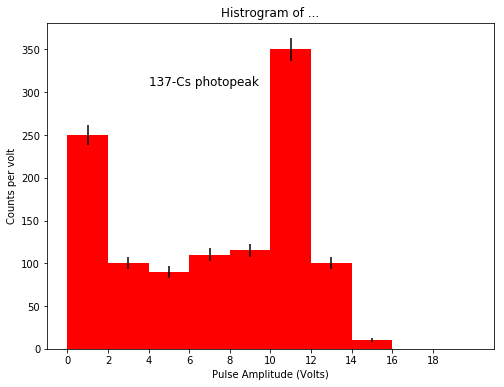

In [4]:
# set histogram parameters

bar_colour    = 'red'                                  # set colour of histogram
figuretitle   = 'Histrogram of ...'                    # set title for the histogram
xlabeltext    = "Pulse Amplitude (Volts)"              # set x-axis label
ylabeltext    = "Counts per volt"                      # set y-axis label
annotatetext1 = "137-Cs photopeak"                     # set text for annotation 1
plt.rcParams["figure.figsize"] = (8,6)                 # set figure size (x,y) in inches

# find minimum and maximum x- and y-values in the data to be plotted

xcountsmin=min(xlower)
xcountsmax=max(xlower) + binwidth
ycountsmin=min(ynorm)
ycountsmax=max(ynorm)

# set minimum and maximum scales for x- and y-axes

xplotmin=xcountsmin
xplotmax=xcountsmax
yplotmin=0.1                  # set non-zero value to avoid error if logarithmic y-axis chosen
yplotmax=ycountsmax*1.1

# set location for annotation

annotatexposition1 = xplotmin+0.2*(xplotmax-xplotmin) # use fraction between 0 and 1 to ensure position is within plot area
annotateyposition1 = yplotmin+0.8*(yplotmax-yplotmin) # use fraction between 0 and 1 to ensure position is within plot area

# plot and save the histogram

plt.bar(xlower,ynorm,binwidth,color=bar_colour,yerr=yerror,align='edge')       # plot the histogram
plt.xlabel(xlabeltext)                                                         # add label for x-axis
plt.ylabel(ylabeltext)                                                         # add label for y-axis
plt.title(figuretitle)                                                         # add figure title
plt.xticks(xlower)                                                             # set size of ticks on x-axis
plt.annotate(annotatetext1,xy=(annotatexposition1,annotateyposition1),size=12) # Sample annotation of graph
plt.savefig(outputfile,bbox_inches = 'tight')                                  # write out spectra to outputfile
plt.show()
